# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama:Aini Nurpadilah
- Email:aininurfadilah354@gmail.com
- Id Dicoding:Aininrp

## Persiapan

### Menyiapkan library yang dibutuhkan

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

### Menyiapkan data yang akan diguankan

## Data Understanding

In [75]:
jayaInstitute = pd.read_csv('/content/drive/MyDrive/DATASCIENCE/student-performance/data.csv', delimiter=";")
jayaInstitute.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [76]:
jayaInstitute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [77]:
jayaInstitute.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [78]:
jayaInstitute.duplicated().sum()

0

In [79]:
jayaInstitute.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Insight :
- Dalam data tidak terdapat missing value
- Tidak ada data yang duplicate
- Jmlah data 4424 dari 36 columns

## Data Preparation / Preprocessing

In [80]:
# persiapan data untuk membuat dashboard
dashboard =jayaInstitute.copy()

In [81]:
application_mode_mapping = {
    1: '1st phase - general contingent',
    2: 'Ordinance No. 612/93',
    5: '1st phase - special contingent (Azores Island)',
    7: 'Holders of other higher courses',
    10: 'Ordinance No. 854-B/99',
    15: 'International student (bachelor)',
    16: '1st phase - special contingent (Madeira Island)',
    17: '2nd phase - general contingent',
    18: '3rd phase - general contingent',
    26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
    27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    39: 'Over 23 years old',
    42: 'Transfer',
    43: 'Change of course',
    44: 'Technological specialization diploma holders',
    51: 'Change of institution/course',
    53: 'Short cycle diploma holders',
    57: 'Change of institution/course (International)'
}

# Dictionary mapping untuk course
course_mapping = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

marital_status_mapping = {
    1: 'single',
    2: 'married',
    3: 'widower',
    4: 'divorced',
    5: 'facto union',
    6: 'legally separated'
}

gender_mapping = {
        1: 'Male',
        0: 'Female'
}

debtor_mapping = {
    1: 'Yes',
    0: 'No'
}

Scholarship_holder_mapping = {
    1: 'Yes',
    0: 'No'
}

In [82]:
dashboard['Application_mode'] = dashboard['Application_mode'].replace(application_mode_mapping)
dashboard['Course'] = dashboard['Course'].replace(course_mapping)
dashboard['Marital_status'] = dashboard['Marital_status'].replace(marital_status_mapping)
dashboard['Gender'] = dashboard['Gender'].replace(gender_mapping)
dashboard['Debtor'] = dashboard['Debtor'].replace(debtor_mapping)
dashboard['Scholarship_holder'] = dashboard['Scholarship_holder'].replace(Scholarship_holder_mapping)

In [83]:
dashboard.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,single,2nd phase - general contingent,5,Animation and Multimedia Design,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),1,Tourism,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,5,Communication Design,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,2,Journalism and Communication,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,1,Social Service (evening attendance),0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [84]:
print(dashboard['Status'].unique())

['Dropout' 'Graduate' 'Enrolled']


In [85]:
dashboard['Status'] = dashboard['Status'].str.strip().str.lower()

dashboard['Status'] = dashboard['Status'].apply(lambda x: 'Dropout' if x == 'dropout' else 'Non-Dropout')
print(dashboard['Status'].unique())

['Dropout' 'Non-Dropout']


In [86]:
dashboard.to_csv('studentnew.csv', index=False)  # data yang disiapkan untuk membuat dashboard

## Exploratory Data Analysis

In [87]:
jayaInstitute['Status'] = jayaInstitute['Status'].apply(lambda x: 1 if x == 'Dropout' else 0)
print(jayaInstitute['Status'].unique())

[1 0]


code dibawah ini akan menggabungkan Graduate dan Enrolled menjadi Not Dropout

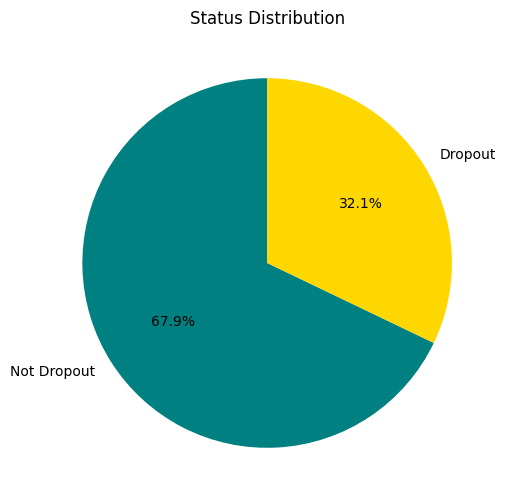

In [88]:
# Menghitung jumlah dan persentase tiap status
status_counts = jayaInstitute['Status'].value_counts()
status_percentages = (status_counts / status_counts.sum()) * 100

# Membuat pie chart
plt.figure(figsize=(8, 6))
colors = ['teal', 'gold']
plt.pie(status_percentages, labels=['Non Dropout', 'Dropout'], autopct='%1.1f%%', colors=colors, startangle=90)

plt.title('Status Distribution')
plt.show()

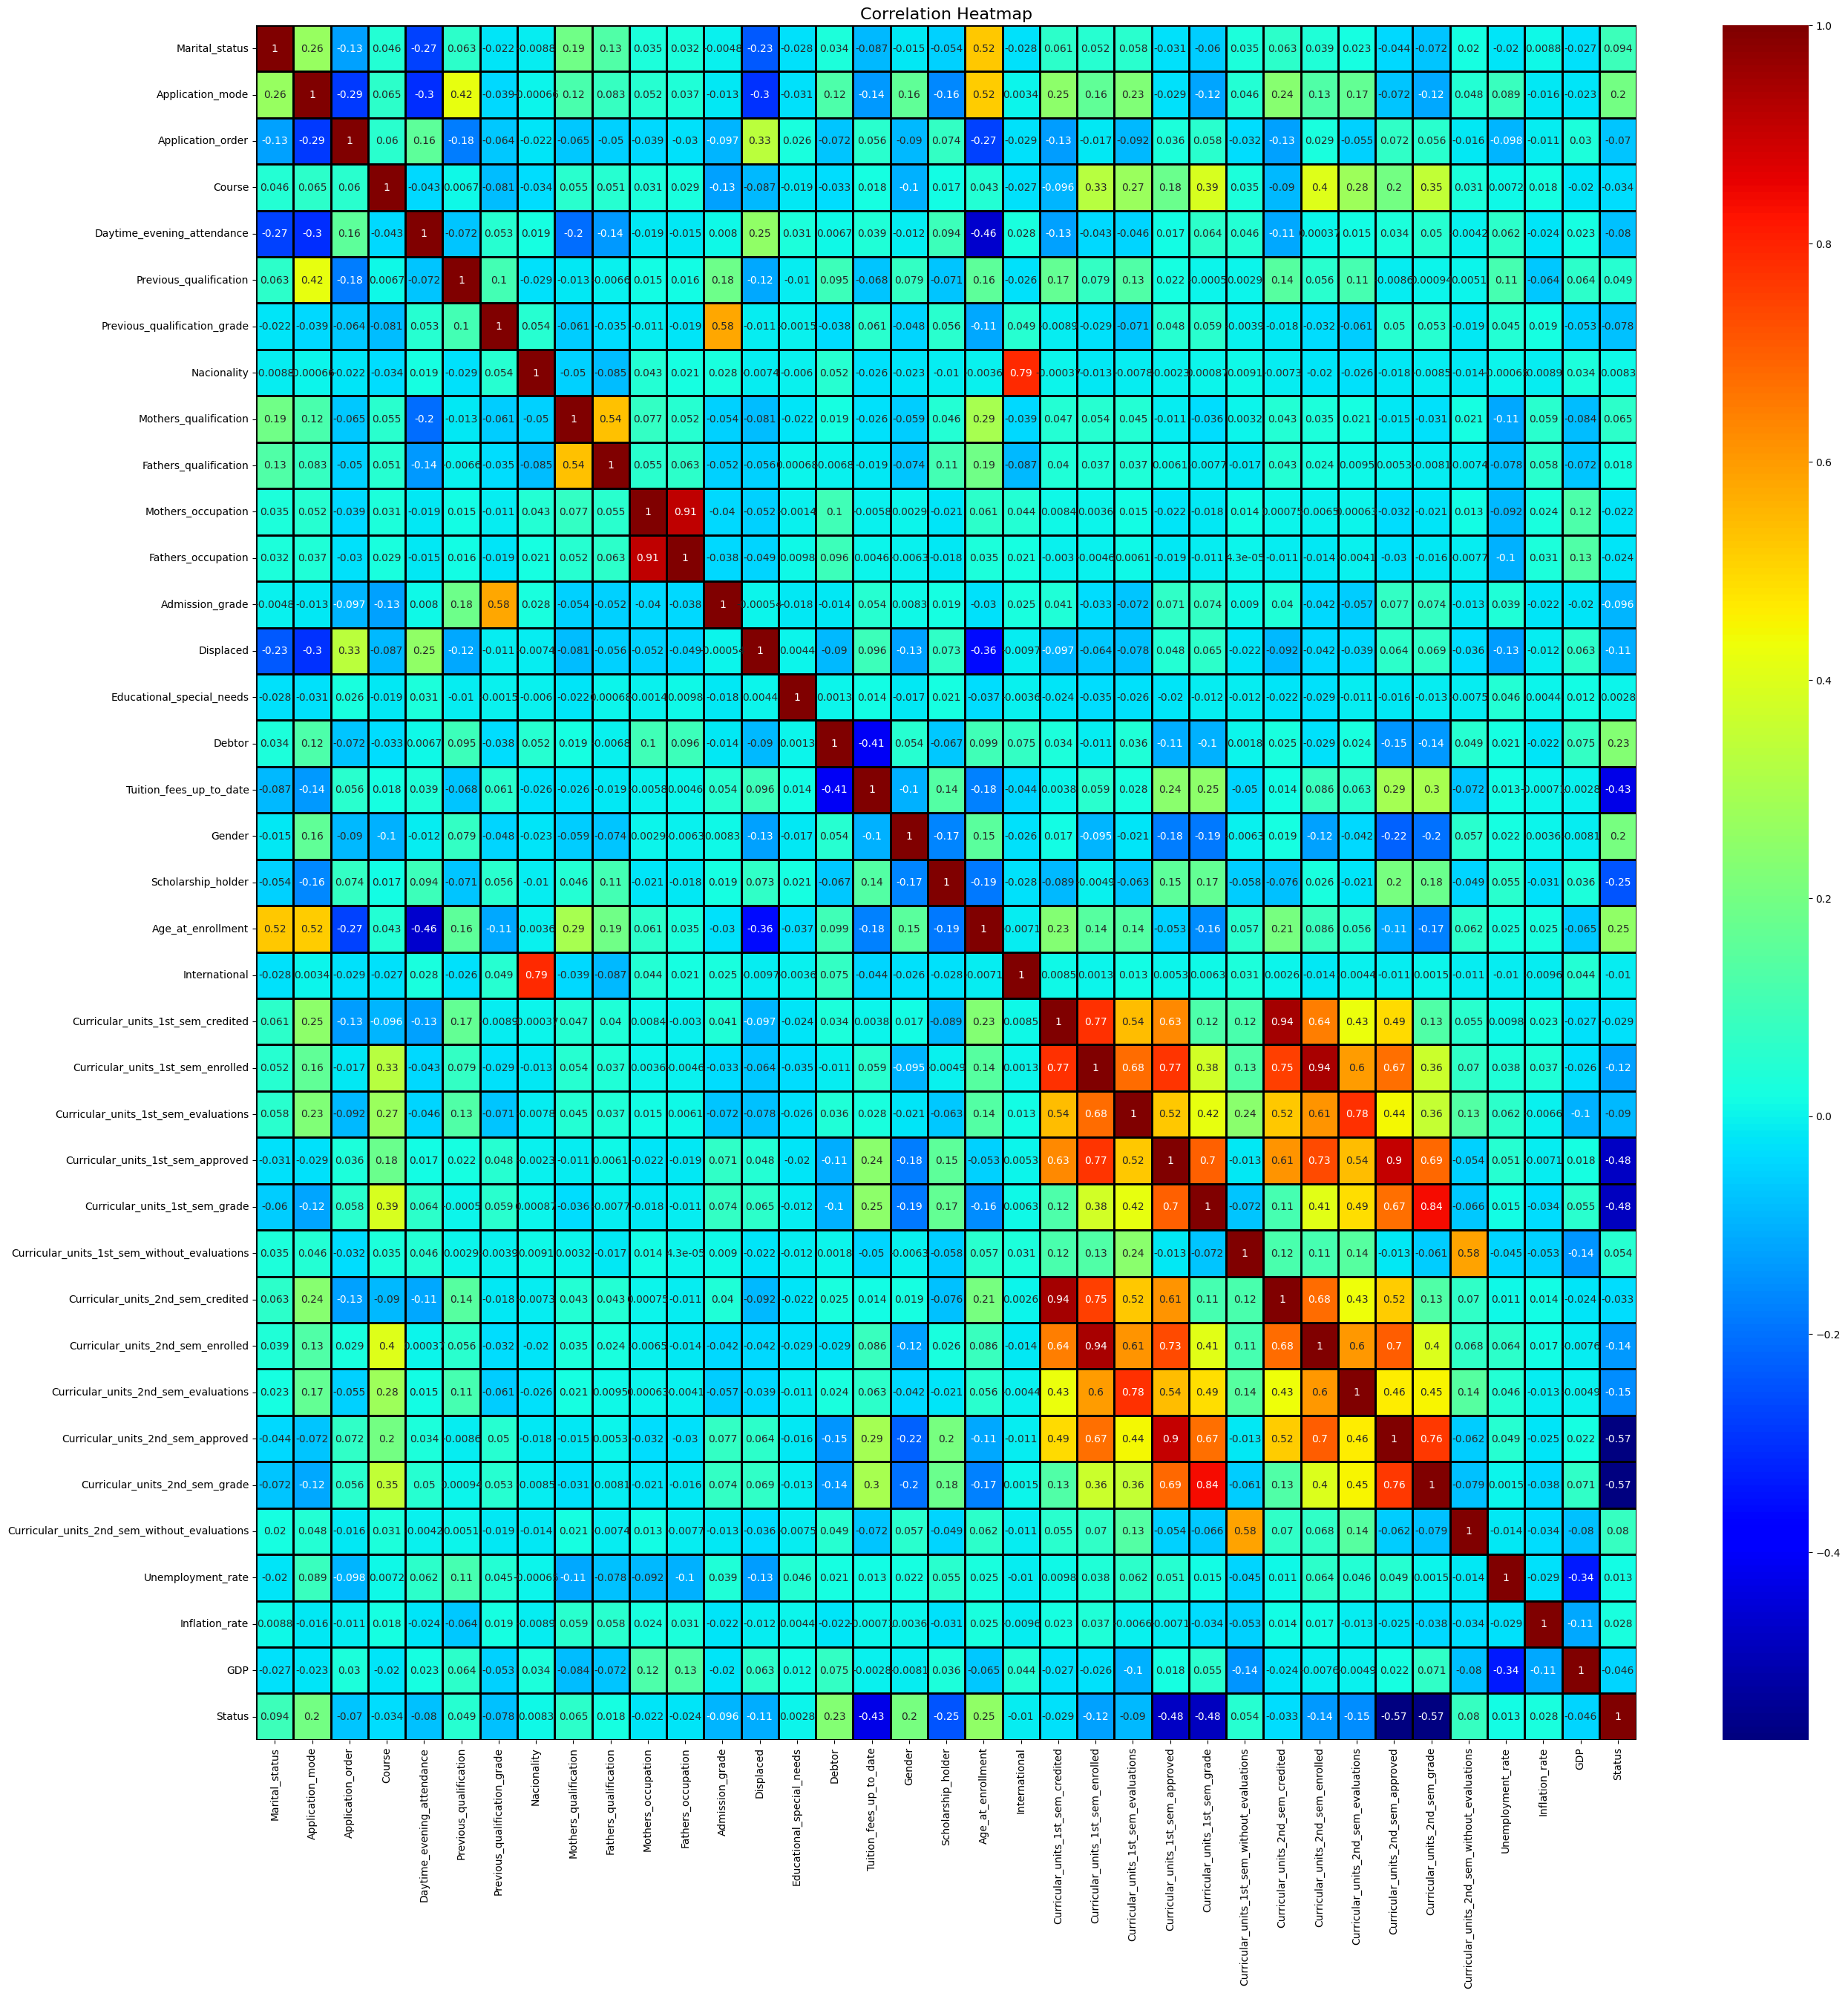

In [89]:
# melakukan analisis untuk melihat korelasi antar column
plt.figure(figsize=(30, 30))
sns.heatmap(jayaInstitute.corr(), annot=True, cmap='jet', linecolor='black', linewidth=1)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

Pada visualisasi data di atas, terlihat beberapa fitur yang saling berkorelasi secara positif maupun negatif. Hal ini menandakan adanya multikolinearitas pada dataset yang kita miliki.

In [90]:
# Mengubah kolom target 'Status' menjadi numerik
status_mapping = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
df_mapping = jayaInstitute.copy()
df_mapping['Status'] = jayaInstitute['Status'].replace(status_mapping)

# Identifikasi fitur numerik dan kategorikal
categorical_columns = jayaInstitute.select_dtypes(include=['object']).columns.tolist()
numerical_columns = jayaInstitute.select_dtypes(include=['int64', 'float64']).columns.tolist()

# One-hot encoding untuk fitur kategorikal (kecuali kolom target 'Status')
df_encoded = pd.get_dummies(df_mapping, columns=[col for col in categorical_columns if col != 'Status'], drop_first=True)

In [91]:
correlation_matrix = df_encoded.corr()
status_correlation = correlation_matrix["Status"].sort_values(ascending=False)
factors = status_correlation
factors = factors.drop('Status')
print("Factors correlated with Status:")
print(factors)

Factors correlated with Status:
Age_at_enrollment                               0.254215
Debtor                                          0.229407
Gender                                          0.203983
Application_mode                                0.198458
Marital_status                                  0.093712
Curricular_units_2nd_sem_without_evaluations    0.079901
Mothers_qualification                           0.064958
Curricular_units_1st_sem_without_evaluations    0.054230
Previous_qualification                          0.049379
Inflation_rate                                  0.027826
Fathers_qualification                           0.018295
Unemployment_rate                               0.012980
Nacionality                                     0.008346
Educational_special_needs                       0.002806
International                                  -0.010360
Mothers_occupation                             -0.021999
Fathers_occupation                             -0.024260

In [92]:
dropout_data = jayaInstitute[jayaInstitute['Status'] == 1]

def plot_student_dropout(df, column, sort=False):
    """Menghitung jumlah mahasiswa dropout berdasarkan kolom tertentu."""
    if sort is not None:
        return df.groupby(column).size().sort_values(ascending=sort)
    else:
        return df.groupby(column).size()

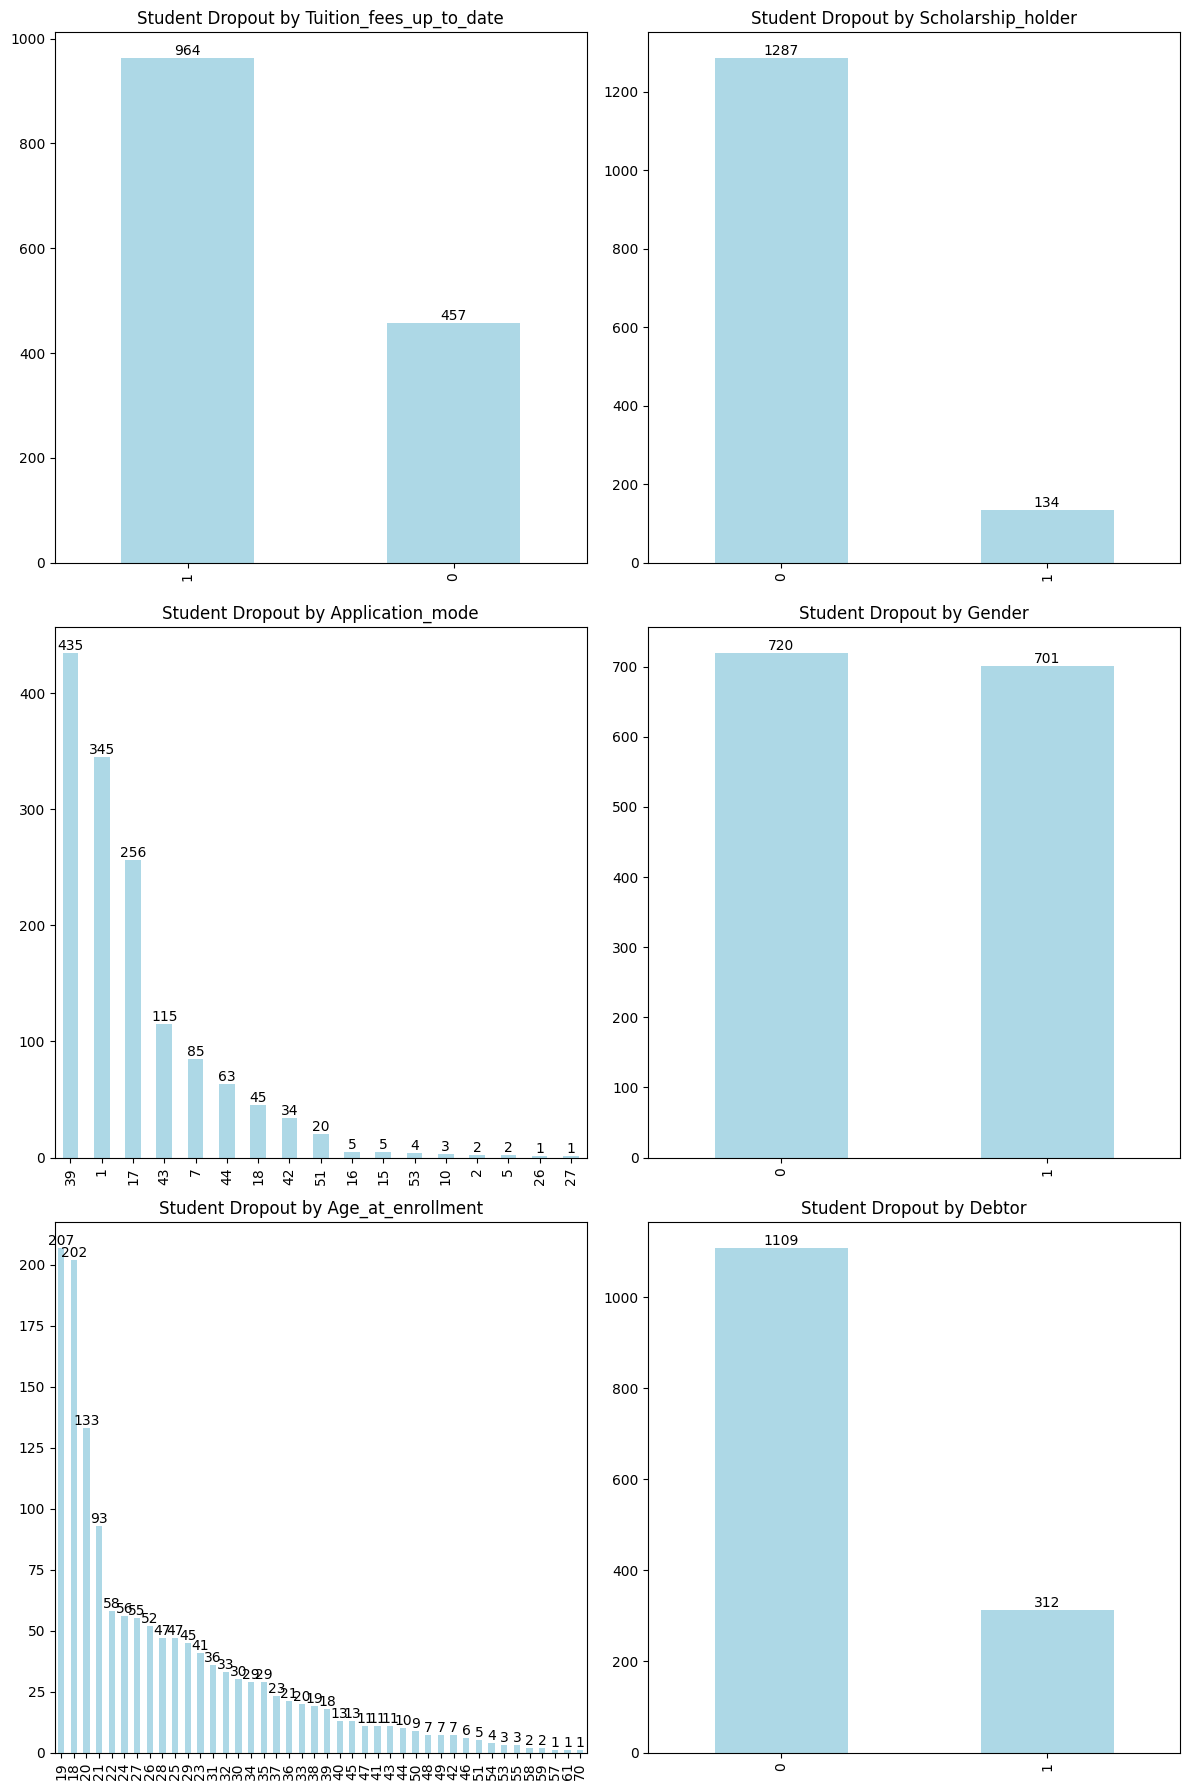

In [93]:
import math

cols = [
    'Tuition_fees_up_to_date',
    'Scholarship_holder',
    'Application_mode',
    'Gender',
    'Age_at_enrollment',
    'Debtor',
]

# Menentukan jumlah baris dan kolom untuk subplot
ncols = min(2, len(cols))
nrows = math.ceil(len(cols) / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 6, nrows * 6))
axes = axes.flatten()

for i, column in enumerate(cols):
    ax = axes[i]
    data = plot_student_dropout(dropout_data, column)
    data.plot(kind='bar', ax=ax, color='lightblue', title=f'Student Dropout by {column}')
    ax.set_xlabel(None)

    for index, value in enumerate(data):
        ax.text(index, value, str(value), ha='center', va='bottom')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Menganalisis nilai mahasiswa berdasarkan min, max, median dan mean.

In [94]:
feature = ['Curricular_units_2nd_sem_approved',
           'Curricular_units_2nd_sem_grade',
           'Curricular_units_1st_sem_approved',
           'Curricular_units_1st_sem_grade'
          ]

In [95]:
jayaInstitute[feature].agg(['min', 'max', 'median', 'mean'])

,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade
min,0.000000,0.000000,0.0000,0.000000
max,20.000000,18.571429,26.0000,18.875000
median,5.000000,12.200000,5.0000,12.285714
mean,4.435805,10.230206,4.7066,10.640822


In [96]:
dropout_agg = jayaInstitute[jayaInstitute['Status'] == 1][feature].agg(['min', 'max', 'median', 'mean'])
non_dropout_agg = jayaInstitute[jayaInstitute['Status'] == 0][feature].agg(['min', 'max', 'median', 'mean'])
pd.concat([dropout_agg, non_dropout_agg], axis=0, keys=['Dropout', 'Non-Dropout'])

Curricular_units_2nd_sem_approved  \
Dropout     min                              0.000000   
            max                             16.000000   
            median                           0.000000   
            mean                             1.940183   
Non-Dropout min                              0.000000   
            max                             20.000000   
            median                           6.000000   
            mean                             5.616717   

                    Curricular_units_2nd_sem_grade  \
Dropout     min                           0.000000   
            max                          17.714286   
            median                        0.000000   
            mean                          5.899339   
Non-Dropout min                           0.000000   
            max                          18.571429   
            median                       12.750000   
            mean                         12.279544   

                    Curricular_units_1st_sem_approved  \
Dropout     min                              0.000000   
            max                             21.000000   
            median                           2.000000   
            mean                             2.551724   
Non-Dropout min                              0.000000   
            max                             26.000000   
            median                           6.000000   
            mean                             5.726274   

                    Curricular_units_1st_sem_grade  
Dropout     min                           0.000000  
            max                          18.000000  
            median                       10.928571  
            mean                          7.256656  
Non-Dropout min                           0.000000  
            max                          18.875000  
            median                       12.714286  
            mean                         12.242187

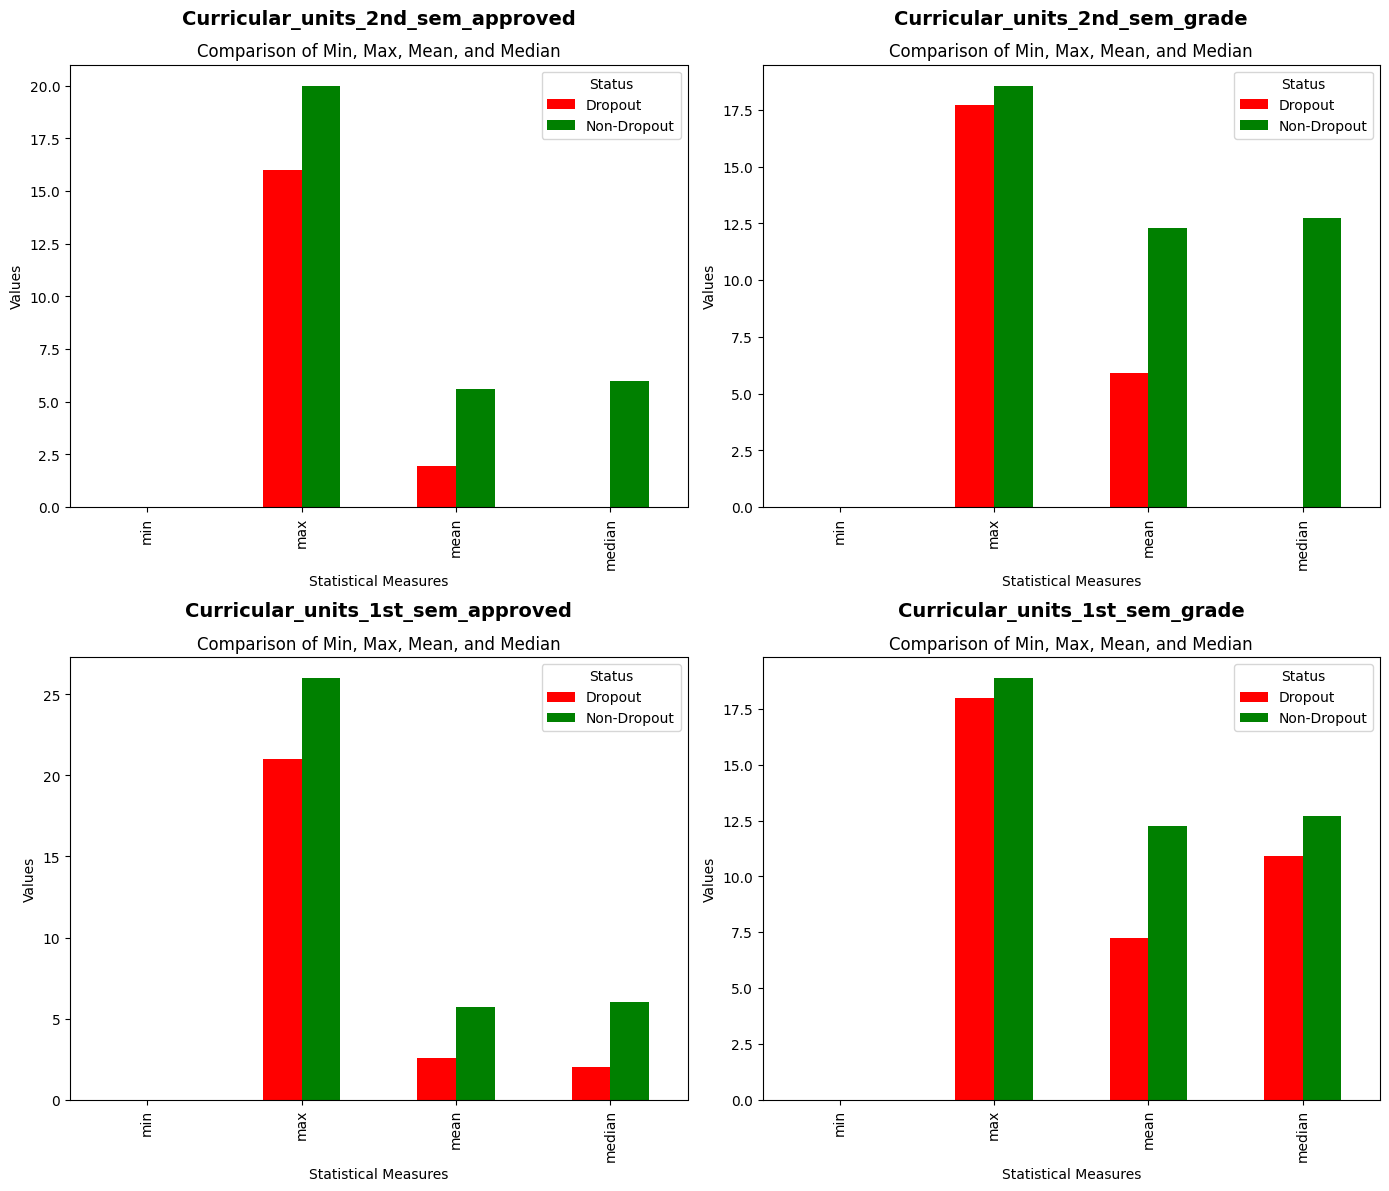

In [120]:
def plot_heatmap_comparison(df, features):
    dropout_df = df[df['Status'] == 1]
    non_dropout_df = df[df['Status'] == 0]

    def calculate_stats(feature, dropout_df, non_dropout_df):
        stats = {
            'dropout': dropout_df[feature].agg(['min', 'max', 'mean', 'median']),
            'non_dropout': non_dropout_df[feature].agg(['min', 'max', 'mean', 'median'])
        }
        return pd.DataFrame(stats)

    heatmap_data = {}
    for feature in features:
        stats = calculate_stats(feature, dropout_df, non_dropout_df)
        heatmap_data[feature] = stats

    heatmap_df = pd.DataFrame(heatmap_data).T

    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_df, annot=True, cmap="viridis")
    plt.title('Heatmap Aggregates untuk Dropout vs Non-Dropout')
    plt.xlabel('Statistical Measures')
    plt.ylabel('Features')
    plt.show()

plot_comparison(jayaInstitute, feature)

<ipython-input-98-0a42e7ff5630>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=factors.values[:10], y=factors.index[:10], dodge=False, palette="coolwarm")


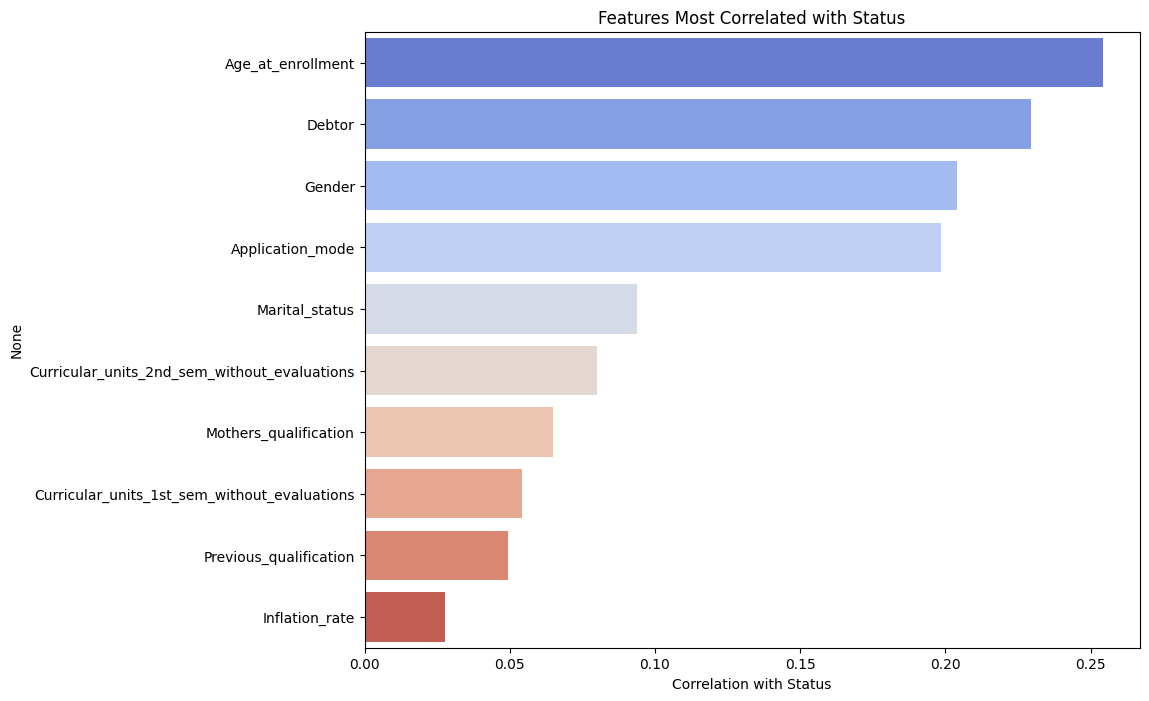

In [98]:
# Plot the top 10 correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=factors.values[:10], y=factors.index[:10], dodge=False, palette="coolwarm")
plt.title("Features Most Correlated with Status")
plt.xlabel("Correlation with Status")
plt.show()

In [99]:
feature_selection = [
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Tuition_fees_up_to_date',
    'Scholarship_holder',
    'Application_mode',
    'Gender',
    'Age_at_enrollment',
    'Debtor',
    'Status'
]

In [100]:
new_df = jayaInstitute[feature_selection]
new_df.head()

,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Tuition_fees_up_to_date,Scholarship_holder,Application_mode,Gender,Age_at_enrollment,Debtor,Status
0,0,0.000000,0,0.000000,1,0,17,1,20,0,1
1,6,13.666667,6,14.000000,0,0,15,1,19,0,0
2,0,0.000000,0,0.000000,0,0,1,1,19,0,1
3,5,12.400000,6,13.428571,1,0,17,0,20,0,0
4,6,13.000000,5,12.333333,1,0,39,0,45,0,0


In [101]:
new_cleaned_df = new_df.copy()

In [102]:
train_df, test_df = train_test_split(new_cleaned_df, test_size=0.2, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [103]:
print(train_df.shape)
print(test_df.shape)

(3539, 11)
(885, 11)


In [104]:
train_df.Status.value_counts()

,count
Status,
0,2434
1,1105


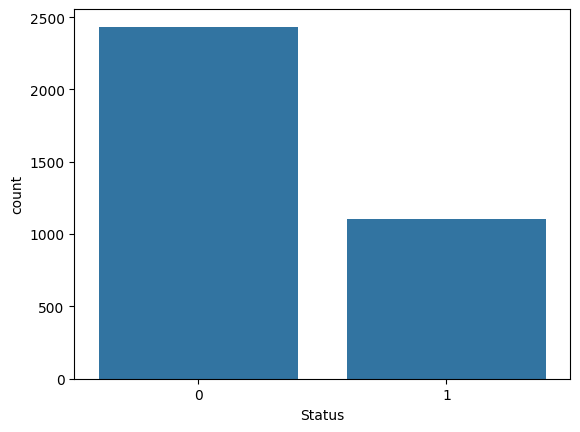

In [105]:
sns.countplot(data=train_df, x="Status")
plt.show()

terlihat bahwa data latih yang kita miliki didominasi oleh kategori “Not Dropout”. Ia menunjukkan terjadinya imbalance data dalam data latih, Hal ini sangat berbahaya karena berpotensi menghasilkan bias sehingga membuat model cenderung memprediksi kelas atau kategori yang dominan (mayoritas).

untuk menangani imbalance data saya akan menggunakan teknik oversampling.

## Oversampling

In [106]:
# Splitting the dataset into majority and minority classes based on 'Status'
df_majority = train_df[train_df.Status == 0]
df_minority = train_df[train_df.Status == 1]

In [107]:
# Oversampling the minority class to match the majority class
df_minority_oversampled = resample(df_minority,
                                   replace=True,
                                   n_samples=len(df_majority),
                                   random_state=42)

# Concatenating the oversampled minority class with the majority class
oversampled_train_df = pd.concat([df_majority, df_minority_oversampled]).reset_index(drop=True)

# Shuffling the dataset after oversampling
oversampled_train_df = shuffle(oversampled_train_df, random_state=42)
oversampled_train_df.reset_index(drop=True, inplace=True)

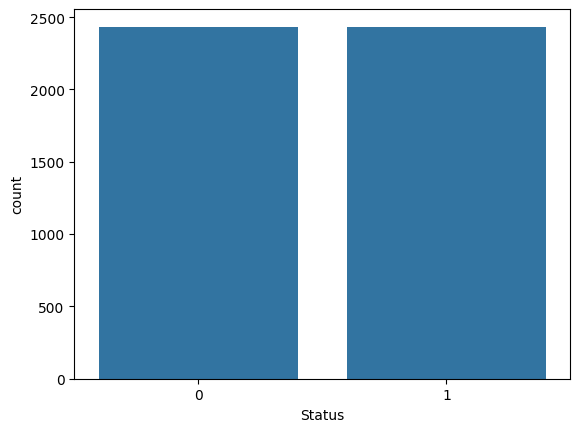

Status
0    2434
1    2434
Name: count, dtype: int64


In [108]:
# Visualizing the class distribution after oversampling
sns.countplot(data=oversampled_train_df, x="Status")
plt.show()

# Checking the value counts after oversampling
print(oversampled_train_df['Status'].value_counts())

data telah balanced

In [109]:
# Undersampling the majority class to match the minority class
df_majority_1_undersampled = resample(df_majority,
                                      replace=False,
                                      n_samples=len(df_minority),
                                      random_state=42)

# Another undersampling step (if needed for further balancing)
df_majority_2_undersampled = resample(df_majority,
                                      replace=False,
                                      n_samples=len(df_minority),
                                      random_state=42)

undersampled_train_df = pd.concat([df_minority, df_majority_1_undersampled]).reset_index(drop=True)
undersampled_train_df = pd.concat([undersampled_train_df, df_majority_2_undersampled]).reset_index(drop=True)

# Shuffling the dataset after undersampling
undersampled_train_df = shuffle(undersampled_train_df, random_state=42)
undersampled_train_df.reset_index(drop=True, inplace=True)

# Sampling 5 rows from the undersampled dataset
undersampled_train_df.sample(5)

,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Tuition_fees_up_to_date,Scholarship_holder,Application_mode,Gender,Age_at_enrollment,Debtor,Status
295,12,11.250000,13,11.642857,1,0,17,1,24,0,1
1674,4,12.000000,3,11.666667,1,0,1,1,19,0,0
1973,0,0.000000,0,0.000000,1,0,43,1,22,0,0
1379,7,12.166667,5,12.500000,1,0,17,0,19,0,0
446,5,12.400000,5,13.000000,1,0,1,0,18,0,0


In [110]:
X_train = undersampled_train_df.drop(columns="Status")
y_train = undersampled_train_df["Status"]

X_test = test_df.drop(columns="Status")
y_test = test_df["Status"]

In [111]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import joblib
import numpy as np

def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))

            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
        return df

def encoding(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))

            df_test["{}".format(feature)] = encoder.transform(df_test[feature])
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))
        return df


In [112]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [113]:
model = RandomForestClassifier(random_state=123)

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [6, 7, 8],
    'criterion' :['gini', 'entropy']
}

CV_tree = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

CV_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 500]})

In [114]:
print("best parameters: ", CV_tree.best_params_)

best parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}


In [115]:
model = RandomForestClassifier(
    random_state=123,
    max_depth=8,
    n_estimators=500,
    max_features='sqrt',
    criterion='gini',
    n_jobs=-1
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation

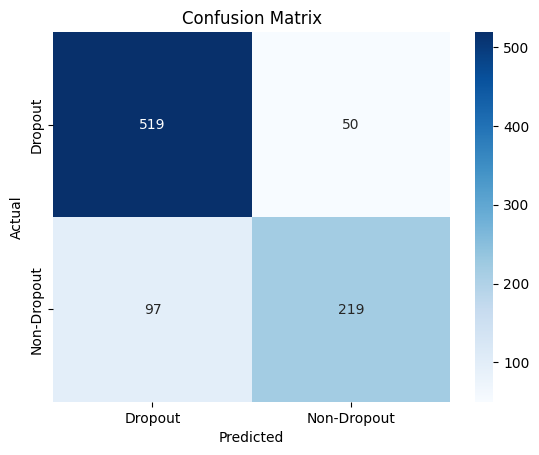

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       569
           1       0.81      0.69      0.75       316

    accuracy                           0.83       885
   macro avg       0.83      0.80      0.81       885
weighted avg       0.83      0.83      0.83       885



In [121]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# Setelah model.fit() pada data pelatihan
y_pred = model.predict(X_test)

# Menampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dropout', 'Non-Dropout'], yticklabels=['Dropout', 'Non-Dropout'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan classification report untuk evaluasi lebih lanjut
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [117]:
# GridSearchCV untuk mencari parameter terbaik
CV_tree = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_tree.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=8, n_estimators=500,
                                              n_jobs=-1, random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 500]})

In [118]:
# Menampilkan parameter terbaik dan hasil evaluasi
print("Best Parameters from GridSearchCV:")
print(CV_tree.best_params_)

Best Parameters from GridSearchCV:
{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}


In [119]:
model_and_scaler = {
    'model': model,
    'scaler': scaler
}

joblib.dump(model_and_scaler, 'model.joblib')

['model.joblib']